IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


DROP NA ROWS

In [ ]:
df.isna().sum()
df.dropna()
df = df.reset_index(drop=True);

In [ ]:
df = df.dropna()
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


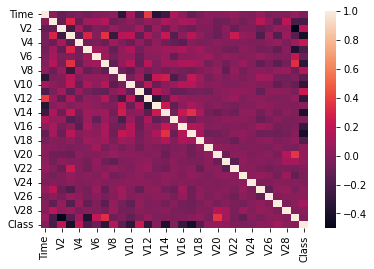

In [ ]:
corr = df.corr()
plt.figure()
sns.heatmap(corr)

SELECT FEATURES AND SPLIT

In [ ]:
X = df[['Time','V1','V2','V3','V4','V5','V7','V8','V9','V10','V11','V12'
,'V14','V16','V17','V18','Amount']]
y = df['Class']

scaler = StandardScaler()
dfLabels = X.columns


XStandard = pd.DataFrame(scaler.fit_transform(X))
XStandard.columns = dfLabels
X=XStandard

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.25),
                                                    random_state=42)

Text(0.5, 0, 'Principal Component')

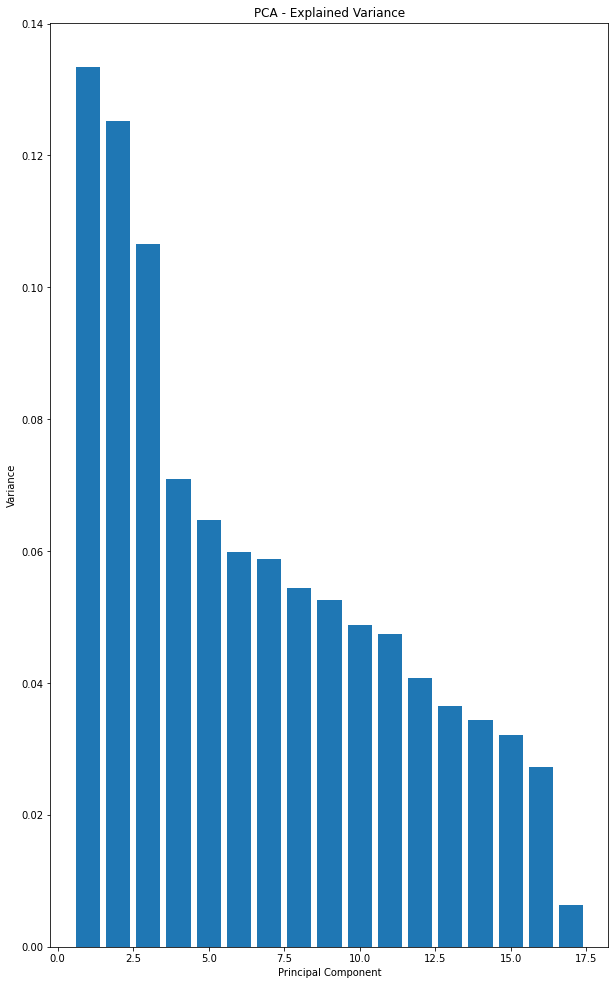

In [ ]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
plt.figure(figsize=(10,17))



plt.bar(t,pca.explained_variance_ratio_)
plt.title("PCA - Explained Variance")
plt.ylabel("Variance")
plt.xlabel("Principal Component")

In [ ]:
pca.explained_variance_ratio_

array([0.13345603, 0.12527457, 0.10649938, 0.07099099, 0.06464556,
       0.05993388, 0.05878026, 0.05434064, 0.05252102, 0.04874358,
       0.04737735, 0.04068757, 0.03646398, 0.03446178, 0.0321599 ,
       0.02731271, 0.00635078])

In [ ]:
X_train_pca4 = X_train_pca[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X_test_pca4 = X_test_pca[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [ ]:
params = {
    'n_neighbors' : [2,3,4,5,6]
}
knn = GridSearchCV(KNeighborsClassifier(p=2),params,verbose = 1, n_jobs = -1, cv=5)


knn.fit(X_train_pca4,y_train)
print(knn.best_params_)
print()
y_pred_test = knn.predict(X_test_pca4)
y_pred_train = knn.predict(X_train_pca4)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Coefficient of Determination:', metrics.r2_score(y_test,y_pred_test))
print()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Coefficient of Determination:', metrics.r2_score(y_train,y_pred_train))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_neighbors': 3}

Mean Absolute Error: 0.0004476275738585497
Mean Squared Error: 0.0004476275738585497
Root Mean Squared Error: 0.021157210918704518
Coefficient of Determination: 0.8819036039488813

Mean Absolute Error: 0.0004476776720761052
Mean Squared Error: 0.0004476776720761052
Root Mean Squared Error: 0.021158394836946048
Coefficient of Determination: 0.8256381234876278


In [ ]:
from sklearn.ensemble import RandomForestClassifier
params  = {
  'max_depth': [10,11,12,13],
  'max_features': [2,3,4], 
  'min_samples_leaf': [3,4,5], 
  'min_samples_split': [1,2,3],
  'n_estimators': [110,120,130]
}

#best features
# {'max_depth': 12,
#  'max_features': 3,
#  'min_samples_leaf': 4,
#  'min_samples_split': 2,
#  'n_estimators': 120}

forest = GridSearchCV(RandomForestClassifier(random_state=1),params, n_jobs=-1, verbose=1,cv=5)
forest.fit(X_train_pca4,y_train)

y_pred_test = forest.predict(X_test_pca4)
y_pred_train = forest.predict(X_train_pca4)

print('Measures of Error: Test Set')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Coefficient of Determination:' , metrics.r2_score(y_test,y_pred_test))
print()
print('Measures of Error: Train Set')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Coefficient of Determination:' , metrics.r2_score(y_train,y_pred_train))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

Measures of Error: Test Set
Mean Absolute Error: 0.0005595344673231871
Mean Squared Error: 0.0005595344673231871
Root Mean Squared Error: 0.02365448091426204
Coefficient of Determination: 0.8523795049361016

Measures of Error: Train Set
Mean Absolute Error: 0.0003357582540570789
Mean Squared Error: 0.0003357582540570789
Root Mean Squared Error: 0.018323707432096784
Coefficient of Determination: 0.8692285926157208


In [ ]:
forest = RandomForestClassifier(max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=120)
forest.fit(X_train_pca4,y_train)

y_pred_test = forest.predict(X_test_pca4)
y_pred_train = forest.predict(X_train_pca4)

print('Measures of Error: Test Set')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Coefficient of Determination:' , metrics.r2_score(y_test,y_pred_test))
print()
print('Measures of Error: Train Set')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Coefficient of Determination:' , metrics.r2_score(y_train,y_pred_train))

Measures of Error: Test Set
Mean Absolute Error: 0.0005595344673231871
Mean Squared Error: 0.0005595344673231871
Root Mean Squared Error: 0.02365448091426204
Coefficient of Determination: 0.8523795049361016

Measures of Error: Train Set
Mean Absolute Error: 0.0004476776720761052
Mean Squared Error: 0.0004476776720761052
Root Mean Squared Error: 0.021158394836946048
Coefficient of Determination: 0.8256381234876278
